In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define your extracted folder path
extract_folder = r"97ba4770c04a9ff00cdc3221ae9c8731bdb445c3"

# Prepare to collect all monthly CSV data
all_dataframes = []

# Loop through each monthly subfolder
for folder in sorted(os.listdir(extract_folder)):
    folder_path = os.path.join(extract_folder, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                file_path = os.path.join(folder_path, file)
                try:
                    df = pd.read_csv(file_path)
                    df['source_month'] = folder  # Track which month it came from
                    all_dataframes.append(df)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

In [3]:
# Combine all dataframes into one
combined_df = pd.concat(all_dataframes, ignore_index=True)
combined_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,source_month,Outcome type
0,9e7ca03e152da26f66e6a39b9561b9db68c70e022b3e53...,2022-04,Gwent Police,Gwent Police,0.088553,51.430913,On or near Bedford Road,E01000426,Bexley 026B,Other theft,Investigation complete; no suspect identified,NaN,2022-04,NaN
1,0e8058d5c2ac2c54d6cfafbb2b7c9c6a607273b12aa2b7...,2022-04,Gwent Police,Gwent Police,-1.958485,52.425637,On or near Middlepark Drive,E01009493,Birmingham 113D,Vehicle crime,Investigation complete; no suspect identified,NaN,2022-04,NaN
2,NaN,2022-04,Gwent Police,Gwent Police,-3.199344,51.794684,On or near Llandaff Road,W01001440,Blaenau Gwent 001A,Anti-social behaviour,NaN,NaN,2022-04,NaN
3,NaN,2022-04,Gwent Police,Gwent Police,-3.202002,51.797040,On or near Heol Siloam,W01001440,Blaenau Gwent 001A,Anti-social behaviour,NaN,NaN,2022-04,NaN
4,NaN,2022-04,Gwent Police,Gwent Police,-3.197188,51.794859,On or near Heol Gwyn Lliw,W01001440,Blaenau Gwent 001A,Anti-social behaviour,NaN,NaN,2022-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338775,8c5485e7ef895a06c5dde244feb26def15c69f031893d5...,2025-03,Gwent Police,Gwent Police,-3.063535,51.640610,On or near Dorallt Close,W01001533,Torfaen 012B,NaN,NaN,NaN,2025-03,Unable to prosecute suspect
338776,fe1e9d79a22182e90ba0644ae5a91831660cb611f25c0c...,2025-03,Gwent Police,Gwent Police,-3.045311,51.660024,On or near Thornhill Road,W01001538,Torfaen 009D,NaN,NaN,NaN,2025-03,Unable to prosecute suspect
338777,439dc4c04f947d7b55eb0afb6646494d24ebed24fec6fc...,2025-03,Gwent Police,Gwent Police,-3.248072,51.782326,On or near Arnold Place,W01001472,Blaenau Gwent 003A,NaN,NaN,NaN,2025-03,Unable to prosecute suspect
338778,7b70961650c26c5fc62551d86e59bbdc643af33a73337d...,2025-03,Gwent Police,Gwent Police,-3.041022,51.584542,On or near Hillside Crescent,W01001674,Newport 009E,NaN,NaN,NaN,2025-03,Unable to prosecute suspect


In [4]:
# Standardize column names
combined_df.columns = combined_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
# Drop 'context' column if it exists
if 'context' in combined_df.columns:
    combined_df.drop(columns=['context'], inplace=True)

In [6]:
# Drop rows missing critical values
clean_df = combined_df.dropna(subset=['latitude', 'longitude', 'crime_type'])

In [7]:
# Remove duplicates and reset index
clean_df = clean_df.drop_duplicates().reset_index(drop=True)
clean_df

,crime_id,month,reported_by,falls_within,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,last_outcome_category,source_month,outcome_type
0,9e7ca03e152da26f66e6a39b9561b9db68c70e022b3e53...,2022-04,Gwent Police,Gwent Police,0.088553,51.430913,On or near Bedford Road,E01000426,Bexley 026B,Other theft,Investigation complete; no suspect identified,2022-04,NaN
1,0e8058d5c2ac2c54d6cfafbb2b7c9c6a607273b12aa2b7...,2022-04,Gwent Police,Gwent Police,-1.958485,52.425637,On or near Middlepark Drive,E01009493,Birmingham 113D,Vehicle crime,Investigation complete; no suspect identified,2022-04,NaN
2,NaN,2022-04,Gwent Police,Gwent Police,-3.199344,51.794684,On or near Llandaff Road,W01001440,Blaenau Gwent 001A,Anti-social behaviour,NaN,2022-04,NaN
3,NaN,2022-04,Gwent Police,Gwent Police,-3.202002,51.797040,On or near Heol Siloam,W01001440,Blaenau Gwent 001A,Anti-social behaviour,NaN,2022-04,NaN
4,NaN,2022-04,Gwent Police,Gwent Police,-3.197188,51.794859,On or near Heol Gwyn Lliw,W01001440,Blaenau Gwent 001A,Anti-social behaviour,NaN,2022-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187515,86a331ec92401cafd3825171c3d4955285898f0594bc0d...,2025-03,Gwent Police,Gwent Police,-2.975725,51.629638,On or near Longbridge,W01001509,Torfaen 013D,Public order,Under investigation,2025-03,NaN
187516,af62db7d22cbefced8eee5c35186e206fe66d7ecdb40ed...,2025-03,Gwent Police,Gwent Police,-2.970687,51.628484,On or near The Orchard,W01001509,Torfaen 013D,Vehicle crime,Investigation complete; no suspect identified,2025-03,NaN
187517,6ce2e678782ab00d0f0f4053fea5af1a5faf1512bf41f4...,2025-03,Gwent Police,Gwent Police,-2.977140,51.633610,On or near Lamb Lane,W01001509,Torfaen 013D,Vehicle crime,Investigation complete; no suspect identified,2025-03,NaN
187518,79eff08089988cb8923a804c5d1ef2c7f41b7ee98c0328...,2025-03,Gwent Police,Gwent Police,-2.973638,51.628640,On or near Hafod Close,W01001509,Torfaen 013D,Violence and sexual offences,Under investigation,2025-03,NaN


In [8]:
# Save to CSV
clean_df.to_csv("cleaned_crime_data.csv", index=False)
print(" Cleaned dataset saved as cleaned_crime_data.csv")

 Cleaned dataset saved as cleaned_crime_data.csv


In [9]:
# Show basic info before detailed cleaning
combined_df.info(), combined_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338780 entries, 0 to 338779
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   crime_id               303465 non-null  object 
 1   month                  338780 non-null  object 
 2   reported_by            338780 non-null  object 
 3   falls_within           338780 non-null  object 
 4   longitude              334614 non-null  float64
 5   latitude               334614 non-null  float64
 6   location               338780 non-null  object 
 7   lsoa_code              334614 non-null  object 
 8   lsoa_name              334614 non-null  object 
 9   crime_type             200074 non-null  object 
 10  last_outcome_category  164759 non-null  object 
 11  source_month           338780 non-null  object 
 12  outcome_type           138706 non-null  object 
dtypes: float64(2), object(11)
memory usage: 33.6+ MB


(None,
                                             crime_id    month   reported_by  \
 0  9e7ca03e152da26f66e6a39b9561b9db68c70e022b3e53...  2022-04  Gwent Police   
 1  0e8058d5c2ac2c54d6cfafbb2b7c9c6a607273b12aa2b7...  2022-04  Gwent Police   
 2                                                NaN  2022-04  Gwent Police   
 3                                                NaN  2022-04  Gwent Police   
 4                                                NaN  2022-04  Gwent Police   
 
    falls_within  longitude   latitude                     location  lsoa_code  \
 0  Gwent Police   0.088553  51.430913      On or near Bedford Road  E01000426   
 1  Gwent Police  -1.958485  52.425637  On or near Middlepark Drive  E01009493   
 2  Gwent Police  -3.199344  51.794684     On or near Llandaff Road  W01001440   
 3  Gwent Police  -3.202002  51.797040       On or near Heol Siloam  W01001440   
 4  Gwent Police  -3.197188  51.794859    On or near Heol Gwyn Lliw  W01001440   
 
             lsoa

In [10]:
# Drop duplicate rows
clean_df.drop_duplicates(inplace=True)

In [11]:
# Reset index after cleaning
clean_df.reset_index(drop=True, inplace=True)

In [12]:
# Show summary after cleaning
clean_summary = {
    "Original Rows": combined_df.shape[0],
    "Cleaned Rows": clean_df.shape[0],
    "Dropped Rows": combined_df.shape[0] - clean_df.shape[0],
    "Remaining Columns": clean_df.columns.tolist(),
    "Missing Values (Top 5 Columns)": clean_df.isnull().sum().sort_values(ascending=False).head(5).to_dict()
}

In [13]:
#tools.display_dataframe_to_user(name="Cleaned Crime Data", dataframe=clean_df)
clean_summary

{'Original Rows': 338780,
 'Cleaned Rows': 187520,
 'Dropped Rows': 151260,
 'Remaining Columns': ['crime_id',
  'month',
  'reported_by',
  'falls_within',
  'longitude',
  'latitude',
  'location',
  'lsoa_code',
  'lsoa_name',
  'crime_type',
  'last_outcome_category',
  'source_month',
  'outcome_type'],
 'Missing Values (Top 5 Columns)': {'outcome_type': 187520,
  'last_outcome_category': 25482,
  'crime_id': 25482,
  'month': 0,
  'reported_by': 0}}

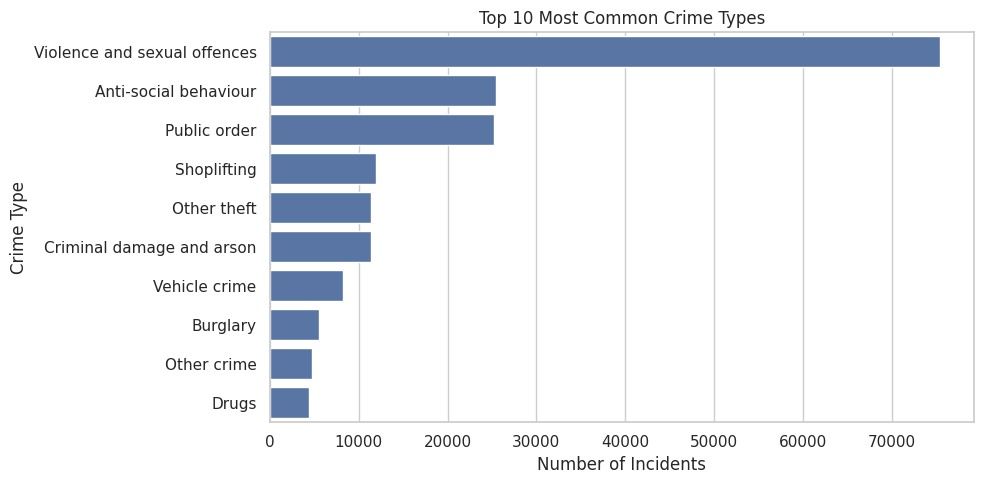

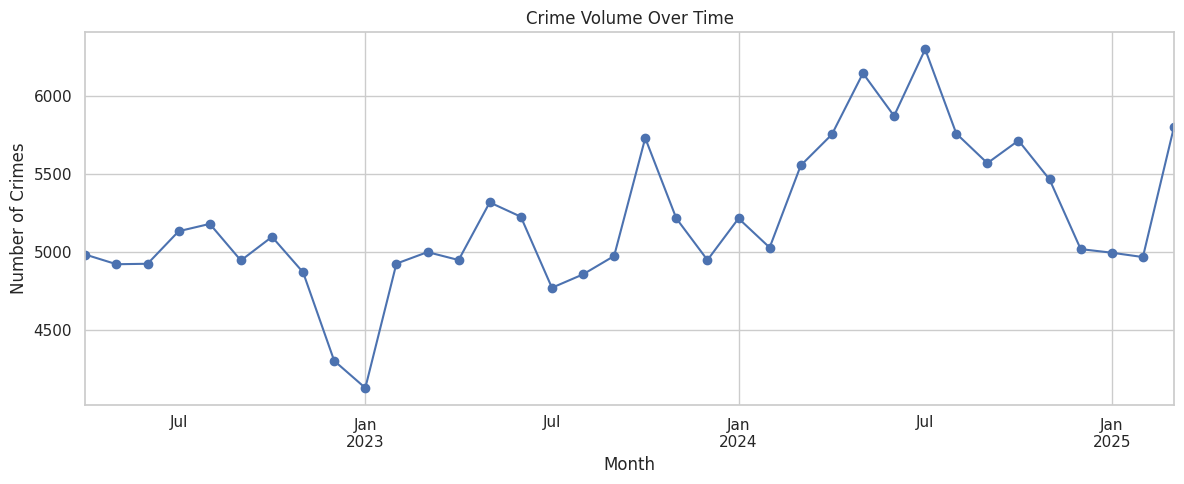

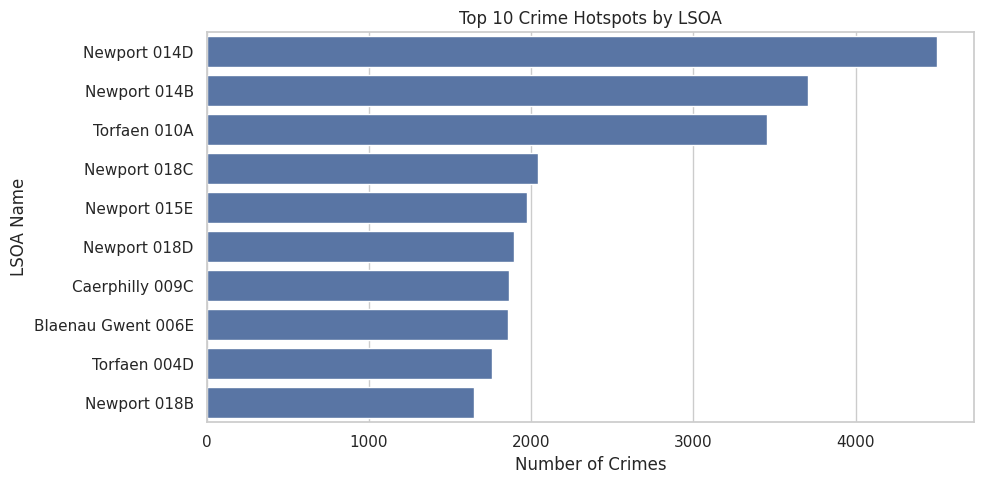

In [14]:
# Set visual style
sns.set(style="whitegrid")

# Top 10 crime types
plt.figure(figsize=(10,5))
sns.countplot(data=clean_df, y='crime_type', order=clean_df['crime_type'].value_counts().head(10).index)
plt.title("Top 10 Most Common Crime Types")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()

# Crimes by month
plt.figure(figsize=(12,5))
clean_df['month'] = pd.to_datetime(clean_df['month'])
monthly_counts = clean_df.groupby(clean_df['month'].dt.to_period("M")).size()
monthly_counts.plot(kind='line', marker='o')
plt.title("Crime Volume Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 LSOA crime hotspots
plt.figure(figsize=(10,5))
sns.countplot(data=clean_df, y='lsoa_name', order=clean_df['lsoa_name'].value_counts().head(10).index)
plt.title("Top 10 Crime Hotspots by LSOA")
plt.xlabel("Number of Crimes")
plt.ylabel("LSOA Name")
plt.tight_layout()
plt.show()


#Featured Engineering

In [15]:
from sklearn.preprocessing import LabelEncoder

# Extract year and month number
clean_df['year'] = clean_df['month'].dt.year
clean_df['month_num'] = clean_df['month'].dt.month

# Encode LSOA and reported_by
le_lsoa = LabelEncoder()
le_force = LabelEncoder()
clean_df['lsoa_encoded'] = le_lsoa.fit_transform(clean_df['lsoa_name'].astype(str))
clean_df['force_encoded'] = le_force.fit_transform(clean_df['reported_by'].astype(str))

# Drop original string columns for modelling
model_df = clean_df[['crime_type', 'longitude', 'latitude', 'year', 'month_num', 'lsoa_encoded', 'force_encoded']]
model_df = model_df.dropna()
model_df


,crime_type,longitude,latitude,year,month_num,lsoa_encoded,force_encoded
0,Other theft,0.088553,51.430913,2022,4,8,0
1,Vehicle crime,-1.958485,52.425637,2022,4,13,0
2,Anti-social behaviour,-3.199344,51.794684,2022,4,14,0
3,Anti-social behaviour,-3.202002,51.797040,2022,4,14,0
4,Anti-social behaviour,-3.197188,51.794859,2022,4,14,0
...,...,...,...,...,...,...,...
187515,Public order,-2.975725,51.629638,2025,3,1050,0
187516,Vehicle crime,-2.970687,51.628484,2025,3,1050,0
187517,Vehicle crime,-2.977140,51.633610,2025,3,1050,0
187518,Violence and sexual offences,-2.973638,51.628640,2025,3,1050,0


#Predictive Modelling - Classify Crime Type

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Encode target
le_crime = LabelEncoder()
model_df['crime_type_encoded'] = le_crime.fit_transform(model_df['crime_type'])

# Define features and target
X = model_df.drop(columns=['crime_type', 'crime_type_encoded'])
y = model_df['crime_type_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_crime.classes_))


Classification Report:
                               precision    recall  f1-score   support

       Anti-social behaviour       0.10      0.07      0.09      5090
               Bicycle theft       0.08      0.04      0.06       161
                    Burglary       0.13      0.09      0.11      1088
   Criminal damage and arson       0.19      0.15      0.17      2283
                       Drugs       0.12      0.08      0.09       867
                 Other crime       0.09      0.05      0.07       929
                 Other theft       0.21      0.14      0.17      2303
       Possession of weapons       0.04      0.02      0.03       280
                Public order       0.20      0.17      0.18      5082
                     Robbery       0.03      0.02      0.02       183
                 Shoplifting       0.53      0.62      0.57      2381
       Theft from the person       0.00      0.00      0.00       127
               Vehicle crime       0.17      0.10      0.13      